# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

## Import Dependencies and Create Alpaca API Environment

In [3]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from dotenv import load_dotenv

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

print(f"Your alpaca key is {type(alpaca_key)}.")
print(f"Your alpaca secret key is {type(alpaca_secret_key)}.")

api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version='V2')

Your alpaca key is <class 'str'>.
Your alpaca secret key is <class 'str'>.


### Get 3 Years Worth of `TSLA` Stock Data via API Call and Read in as DataFrame 

In [8]:
# Set the ticker
tsla_ticker = ['KO', 'SBUX', 'NKE']

# Set timeframe to '1D'
tsla_timeframe = '1D'

# Set start and end datetimes of 3 years from Today
tsla_start_date = pd.Timestamp('2018-1-1', tz='America/New_York').isoformat()
tsla_end_date = pd.Timestamp('2021-1-1', tz='America/New_York').isoformat()

# Get 3 years worth of historical data for TSLA
tsla_df = api.get_barset(tsla_ticker, timeframe=tsla_timeframe, start=tsla_start_date, end=tsla_end_date, limit=1000).df

tsla_df.head()

KO                                    NKE  \
                            open    high     low  close   volume   open   
time                                                                      
2018-01-02 00:00:00-05:00  45.91  45.940  45.505  45.55  8059230  62.85   
2018-01-03 00:00:00-05:00  45.49  45.690  45.340  45.42  7324413  63.48   
2018-01-04 00:00:00-05:00  45.56  46.215  45.450  46.08  9368841  63.40   
2018-01-05 00:00:00-05:00  46.02  46.200  45.790  46.04  8376423  63.70   
2018-01-08 00:00:00-05:00  45.95  46.100  45.880  46.00  5210266  64.15   

                                                            SBUX         \
                            high      low  close   volume   open   high   
time                                                                      
2018-01-02 00:00:00-05:00  63.49  62.8500  63.49  4341886  57.95  58.21   
2018-01-03 00:00:00-05:00  63.66  62.7600  63.47  4834564  57.92  58.96   
2018-01-04 00:00:00-05:00  63.55  62.5500  63.44  4789509  58.99  59.41   
2018-01-05 00:00:00-05:00  64.30  63.4701  63.97  6485377  59.13  59.69   
2018-01-08 00:00:00-05:00  64.71  63.9800  64.55  9204706  59.48  59.67   

                                                  
                             low  close   volume  
time                                              
2018-01-02 00:00:00-05:00  57.48  57.63  5759477  
2018-01-03 00:00:00-05:00  57.80  58.72  5967040  
2018-01-04 00:00:00-05:00  58.73  58.94  4693409  
2018-01-05 00:00:00-05:00  59.07  59.58  4635754  
2018-01-08 00:00:00-05:00  58.56  59.28  4911992

### Run the Monte Carlo Simulation

In [13]:
# Set number of simulations
num_of_sim = 50

wt = [0.6, 0.2, 0.2]

# Configure a Monte Carlo simulation to forecast three years daily returns
tsla_mc = MCSimulation(portfolio_data=tsla_df, weights=wt, num_simulation=num_of_sim, num_trading_days=252*3)

tsla_mc.portfolio_data.shape

(756, 18)

In [15]:
# Run Monte Carlo simulations to forecast three years daily returns
tsla_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988240,1.000642,0.998815,0.986588,0.991108,1.003068,0.989302,0.986856,0.994187,0.999901,...,1.009160,1.008680,1.012306,0.982301,0.998394,1.013597,1.003273,0.990750,1.009791,1.000373
2,0.993940,1.007634,0.995548,0.993834,0.983102,0.990086,0.989163,0.976262,0.989290,1.014820,...,1.023376,1.006830,1.000607,0.972931,0.996909,1.029591,1.005978,1.006302,1.012164,1.002994
3,0.995977,1.006588,1.012763,1.001516,0.968923,0.996335,0.983060,0.964818,0.982706,0.998516,...,1.024111,1.004666,0.990628,0.977216,0.985482,1.038347,1.004379,0.994240,1.023121,1.006612
4,0.977130,1.013656,1.037857,1.011690,0.972430,0.997323,0.978599,0.947475,0.988049,1.012759,...,1.040381,1.000551,0.980000,0.968458,0.974552,1.033195,0.984736,1.003451,1.032593,1.005895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2.485181,1.151900,1.123280,1.634324,1.578795,1.553537,1.792429,2.900526,2.127208,2.045050,...,2.273671,1.006125,1.740421,1.034631,1.694218,1.770205,0.985072,1.076969,1.090284,2.511620
753,2.466234,1.112713,1.127427,1.630069,1.589455,1.582823,1.807976,2.819212,2.095654,2.010690,...,2.255955,1.029489,1.764175,1.035898,1.643700,1.756081,0.991341,1.081100,1.090306,2.505557
754,2.445857,1.115687,1.126738,1.621526,1.593911,1.591956,1.809552,2.826837,2.104147,2.048117,...,2.247882,1.041283,1.741778,1.055095,1.653724,1.760989,0.982500,1.085973,1.079494,2.490262
755,2.448917,1.121375,1.124918,1.655168,1.616982,1.587524,1.826953,2.835289,2.103278,2.057457,...,2.256918,1.058706,1.767112,1.061656,1.643346,1.733192,0.969117,1.077523,1.089469,2.516243


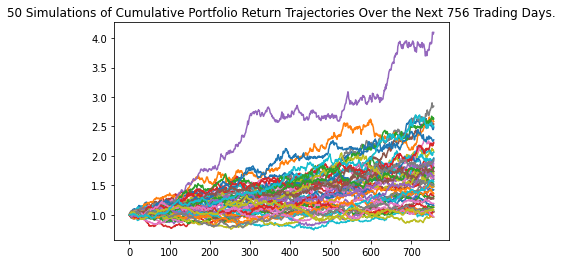

In [25]:
tsla_line_plot = tsla_mc.plot_simulation()

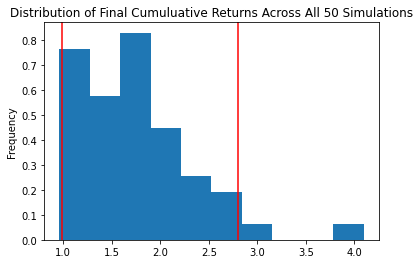

In [17]:
tsla_dist_plot = tsla_mc.plot_distribution()

### Create a new DataFrame to hold the summary statistics for the simulated daily returns.

In [18]:
# Compute summary statistics from the simulated daily returns
tsla_summary = tsla_mc.summarize_cumulative_return()
print(tsla_summary)

# Create a DataFrame with the summary statistics
tsla_summary = {
    'mean': list(tsla_mc.simulated_return.mean(axis=1)),
    'median': list(tsla_mc.simulated_return.median(axis=1)),
    'max': list(tsla_mc.simulated_return.max(axis=1)),
    'min': list(tsla_mc.simulated_return.min(axis=1))
}

tsla_summary_df = pd.DataFrame(tsla_summary)

# Display sample data
print()
tsla_summary_df.tail()

count           50.000000
mean             1.735369
std              0.593777
min              0.959525
25%              1.306639
50%              1.662579
75%              1.960766
max              4.095541
95% CI Lower     0.982911
95% CI Upper     2.796380
Name: 756, dtype: float64



,mean,median,max,min
752,1.728624,1.643405,3.995166,0.966343
753,1.728970,1.639034,4.098531,0.962296
754,1.730169,1.638951,4.082004,0.970856
755,1.732092,1.649257,4.066672,0.958872
756,1.735369,1.662579,4.095541,0.959525


### Generate a line plot to visualize the summary statistics for the simulated daily returns

<AxesSubplot:title={'center':'Simulated daily returns for TSLA over 3 years'}>

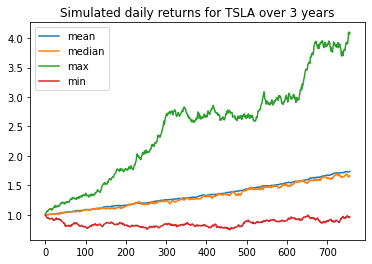

In [19]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
tsla_summary_df.plot(title='Simulated daily returns for TSLA over 3 years')

### Create a new DataFrame to hold the summary statistics for the simulated daily returns assuming an initial investment of `$10,000`

In [20]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulated stock prices to return the progression of daily returns in terms of money
projected_simulated_daily_returns = initial_investment * tsla_summary_df

# Display sample data
projected_simulated_daily_returns.head()

,mean,median,max,min
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10010.026340,10000.334195,10308.201768,9822.428921
2,10009.176888,10023.642746,10419.787860,9729.309784
3,10026.708710,10027.662942,10513.519895,9648.175735
4,10028.876873,9995.905246,10647.787405,9474.752841


### Generate a line plot to visualize the updated summary statistics for simulated daily returns using a `$10,000` initial investment

<AxesSubplot:title={'center':'Simulated returns'}>

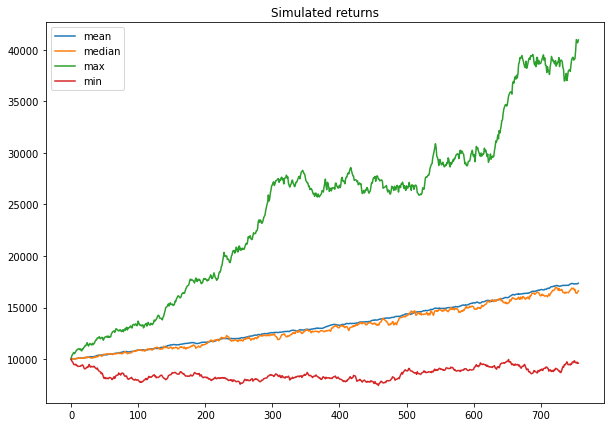

In [21]:
# Use the 'plot' function to create a chart of the simulated profits/losses
projected_simulated_daily_returns.plot(title='Simulated returns', figsize=(10, 7))

### Calculate the range of possible outcomes for our $10,000 investment with a `95%` confidence interval

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = tsla_mc.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             1.735369
std              0.593777
min              0.959525
25%              1.306639
50%              1.662579
75%              1.960766
max              4.095541
95% CI Lower     0.982911
95% CI Upper     2.796380
Name: 756, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = tbl[8] * 10000
ci_upper = tbl[9] * 10000

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 3 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 3 years will end within the range of $9829.113971968423 and $27963.801086009702.
